# Summary
In this notebook we:
1. reproduce figure 1.a and b from Arias-Reyes et .al (2021; https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0237294)
2. demonstrate that the correlation found is an artifact of the grouping methodology:
    - replacing actual cases per city with constan and random values produces statistically indistinguishable results
    - varying the altitude binning window produces different results

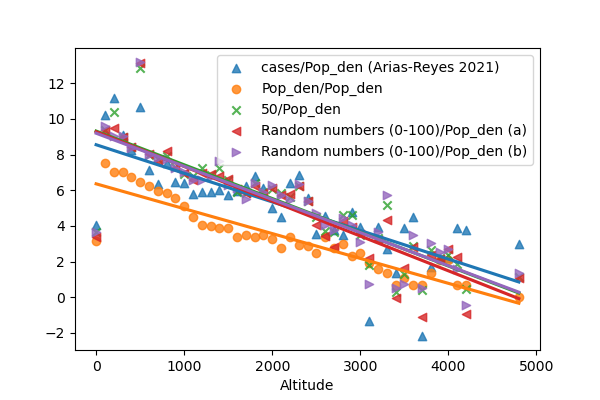

In [1]:
from IPython import display; display.Image("soliz2021.png")

# import libraries 

In [2]:
# load and autoreload
from IPython import get_ipython
# noinspection PyBroadException
try:
    _magic = get_ipython().magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass
    
import pprint
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

# open/treat file 

In [3]:
f = './data/soliz_2021.xlsx'
df = pd.read_excel(f)

# normalized ln as suggested by Arias-Reyes 2021 
lcp = 'ln(cases/Pop_den)'
df[lcp] = np.log(df['cases/Pop_den'])


# replace cases with random number from 0-100 for each city 
np.random.seed(10)
l = np.random.rand(len(df))*100
mock_a = 'Random numbers (0-100)/Pop_den (a)'
df[mock_a] = l/df['Population density']

np.random.seed(34)
l = np.random.rand(len(df))*100
mock_b = 'Random numbers (0-100)/Pop_den (b)'
df[mock_b] = l/df['Population density']



# replace cases with a constant value of 50 
one  = '50/Pop_den'
df[one] = 50/df['Population density']

# replaces cases with 1 
pp = 'Pop_den/Pop_den'
df[pp] = df['Population density']/df['Population density']

# cases/pop_den as used by Arias-Reyes 2021
s2021 = 'cases/Pop_den (Arias-Reyes 2021)'
df[s2021] = df['cases/Pop_den']

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# succesfully reproduce figure 1.b 

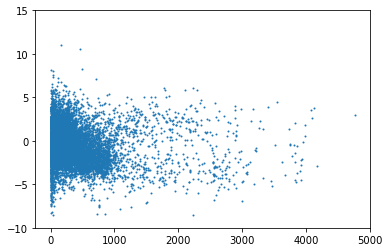

In [4]:
_y = df[lcp]
_x = df['Altitude']

f,ax = plt.subplots()
ax.scatter(_x,_y,s=1)
ax.set_ylim(-10,15);

# succesfully reproduce figure 1.a

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],r (corr)
x1,-0.001603,0.000201,-7.98895,5.797993e-10,-0.002008,-0.001198,-0.776603


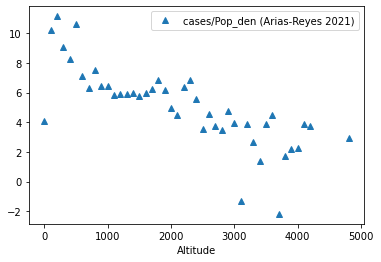

In [5]:
def get_stats(h,o):
    _x = h.index
    _y = h[o]

    _x1 = sm.add_constant(_x)
    model = sm.OLS(_y,_x1)
    _df = model.fit().summary2().tables[1].loc['x1']
    _df['r (corr)'] = np.corrcoef(_x,_y)[1,0]
    return _df


df1 = df[df[lcp]>-1000000]

c  = 100
g = df1.groupby(np.round((df1['Altitude'])/c + .4999)*c)

h = np.log(g[[s2021]].sum())

h.plot(lw=0,marker='^')

get_stats(h,s2021).to_frame().T

# Exemplify that the correlation and p values obtained are artifacts of the grouping procedure

- for this purpose replace the actual number of cases per city with:
    - Pop_den: the population density (i.e 1) 
    - 50: a constant number of 50 
    - Random numbers (0-100): random number from 0-100 
    
observe in the stats table that all r values are similar and p < 000.1. In other words the results are found regardles of the number of cases per city. 

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],r (corr)
cases/Pop_den (Arias-Reyes 2021),-0.001603,0.000201,-7.988950,5.797993e-10,-0.002008,-0.001198,-0.776603
Pop_den/Pop_den,-0.001395,0.000092,-15.115965,1.366327e-18,-0.001581,-0.001208,-0.919091
50/Pop_den,-0.001891,0.000163,-11.583997,1.165479e-14,-0.002221,-0.001562,-0.872708
Random numbers (0-100)/Pop_den (a),-0.001950,0.000177,-11.004938,5.959888e-14,-0.002307,-0.001592,-0.861686
Random numbers (0-100)/Pop_den (b),-0.001857,0.000177,-10.466121,2.829301e-13,-0.002215,-0.001499,-0.850203


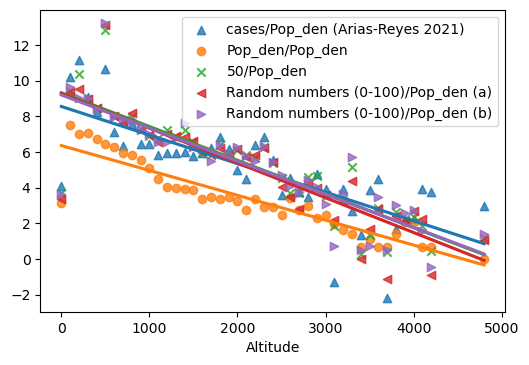

In [6]:
c  = 100
g = df1.groupby(np.round((df1['Altitude'])/c + .4999)*c)

cols = [s2021,pp,one,mock_a,mock_b]
h = np.log(g[cols].sum())


# include constant in ols models, which is not done by default
st = pd.DataFrame()

for o in cols:
    st[o] = get_stats(h,o)
    
f,ax = plt.subplots(dpi=100)

for a,m in zip(cols,['^','o','x','<','>']):
#     ax.scatter(x=h.index,y=h[a],label=a,facecolor='none') 
    sns.regplot(x=h.index,y=h[a], ax =ax,label=a,marker=m,ci=None)

ax.set_ylabel('')
ax.legend()

f.savefig('soliz2021.png')
st.T

# varying the grouping bin width 

Furthermore the results are dependant to the bin with

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],r (corr)
10,-0.002160,0.000121,-17.877314,4.315537e-50,-0.002398,-0.001922,-0.706333
50,-0.001936,0.000176,-11.023745,8.615457e-18,-0.002285,-0.001587,-0.774626
100,-0.001603,0.000201,-7.988950,5.797993e-10,-0.002008,-0.001198,-0.776603
500,-0.000981,0.000400,-2.452379,3.661352e-02,-0.001887,-0.000076,-0.632903


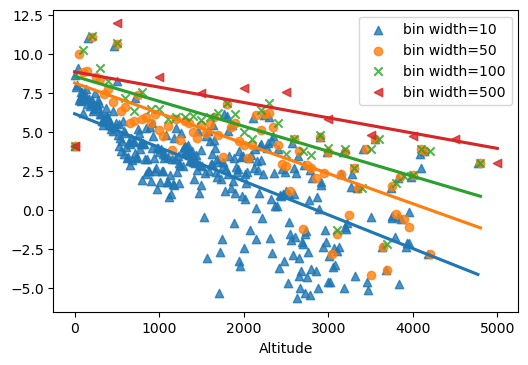

In [7]:
f,ax = plt.subplots(dpi=100)

cc = [10,50,100,500]
st = pd.DataFrame()
for c,m in zip(cc,['^','o','x','<','>']):
    g = df1.groupby(np.round((df1['Altitude'])/c + .4999)*c)

    h = np.log(g[[s2021]].sum())

    
    st[c] = get_stats(h,s2021)
    

#     ax.scatter(x=h.index,y=h[a],label=a,facecolor='none') 
    sns.regplot(x=h.index,y=h[s2021], ax =ax,label=f'bin width={c}',marker=m,ci=None)

ax.set_ylabel('')
ax.legend()

st.T

# extra

In [8]:
!jupyter-nbconvert --to html soliz_2021.ipynb

[NbConvertApp] Converting notebook soliz_2021.ipynb to html
[NbConvertApp] Writing 901072 bytes to soliz_2021.html
